# Predictive Analytics: Classification (Diabetic)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats

from scipy.stats import kurtosis

In [27]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [28]:
# Identifying the shape of the data frame
print(f'The diabetic training DataFrame has a total of: \n {df_train.shape[0]} rows\n {df_train.shape[1]} columns')

The diabetic training DataFrame has a total of: 
 614 rows
 10 columns


### Data Cleaning

In [29]:
df_train.head(10)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
5,152,4,114,65,0,0,21.9,0.432,37,0
6,173,2,87,0,23,0,28.9,0.773,25,0
7,276,2,100,70,52,57,40.5,0.677,25,0
8,624,0,94,70,27,115,43.5,0.347,21,0
9,443,4,117,64,27,120,33.2,0.230,24,0


### Missing Data

The grpah provide a quick visual for easy intepretation of missing data with a line graph.

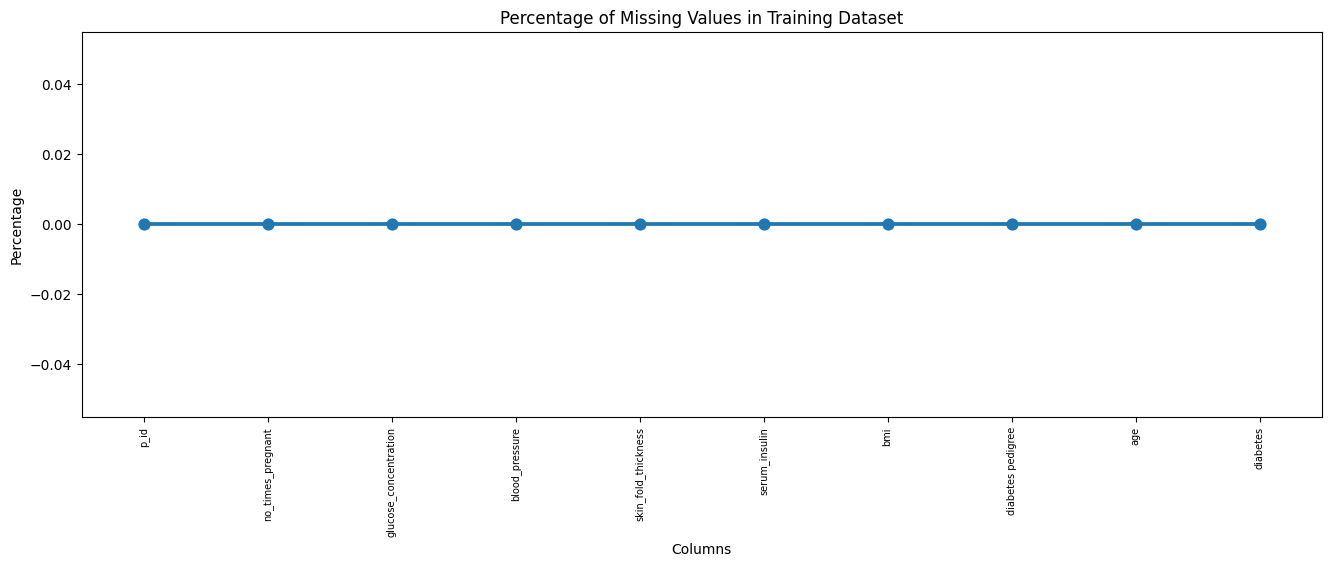

In [30]:
# Creation of new df to calculate percentage of missing data
missing = pd.DataFrame((df_train.isnull().sum()) * 100 / df_train.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Training Dataset")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

The table below provide a confirmation with no missing data in the dataset as all variable have 0% of missing value.

In [31]:
# Calculate Nan percent in each column
nan_percent_pa = (df_train.isna().sum() / len(df_train)) * 100


# Create a DataFrame from the series
nan_percent_pa_df = nan_percent_pa.reset_index()
nan_percent_pa_df.columns = ['Column', 'NaN_Percent']


# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_df = nan_percent_pa_df.sort_values(by='NaN_Percent', ascending=False)


# Print the top variable with missing data in the variable. Because there is 14 variable with missing data therefore only the top 14 is display.
nan_percent_df.head(5)

,Column,NaN_Percent
0,p_id,0.0
1,no_times_pregnant,0.0
2,glucose_concentration,0.0
3,blood_pressure,0.0
4,skin_fold_thickness,0.0


### Exploration of Data

In [32]:
df_train.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

## EDA

### Univariate Analysis

In [33]:
df_train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


Based on the count plot below, it can be seen that there is an imbalance in the target variable.

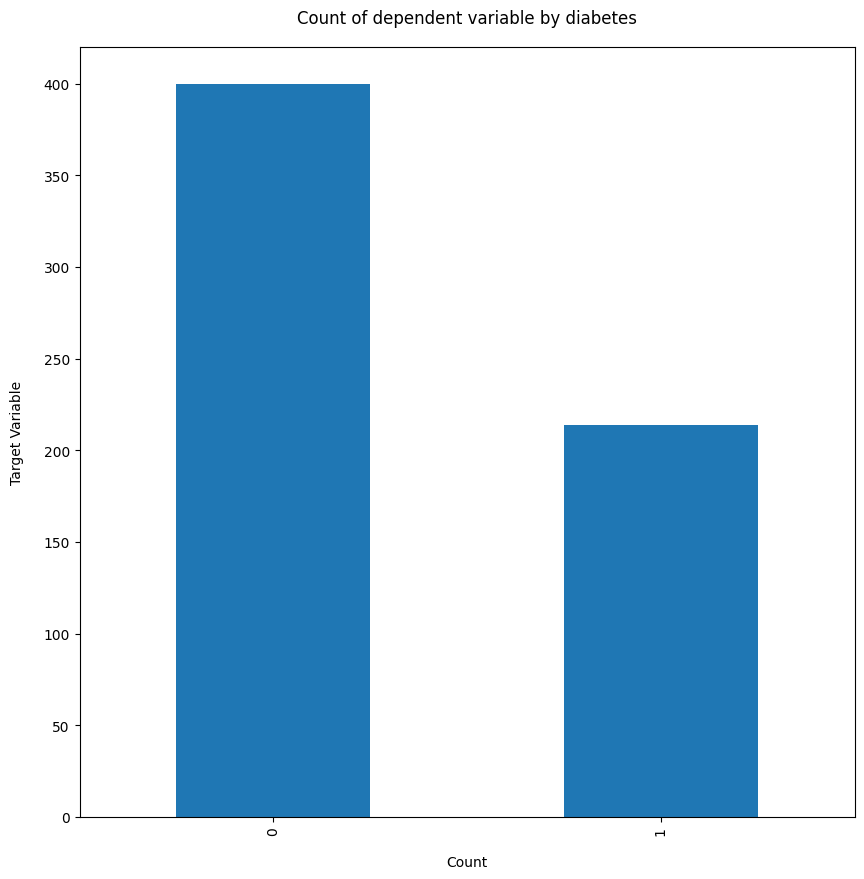

In [38]:
# Plot the variable in a horizontal bar chart to illustrate the imbalance data
df_train['diabetes'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of dependent variable by diabetes", y=1.02);

The pie chart below exhibit that 65% of the target variable are not diabetes and only 35% are diabetes.

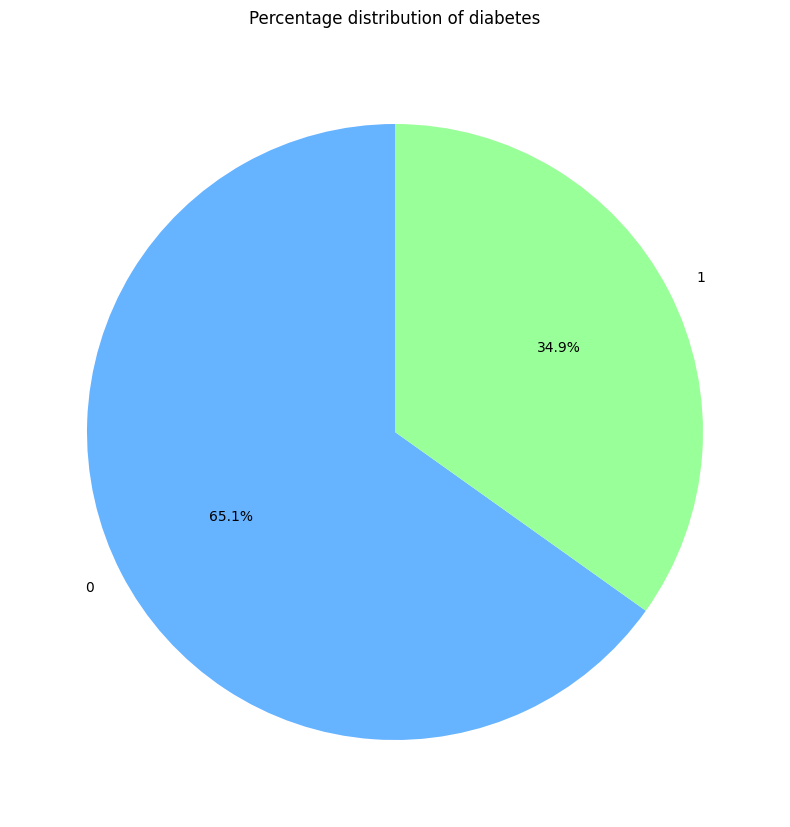

In [40]:
# Calculate the value counts
value_counts = df_train['diabetes'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])

# Customize the plot
plt.ylabel('')  # Remove the y-label
plt.title('Percentage distribution of diabetes', y=1.02)

# Show the plot
plt.show()


It can be seen that majority of the patient are on the younger spectrum therefore the sample is positively skew of 1.14. On the other hand, it has a kurtosis of 0.66 therefore exhibiting higher count of younger patient with diabetes suggesting moderate signifiacnt variation in data distribution.  

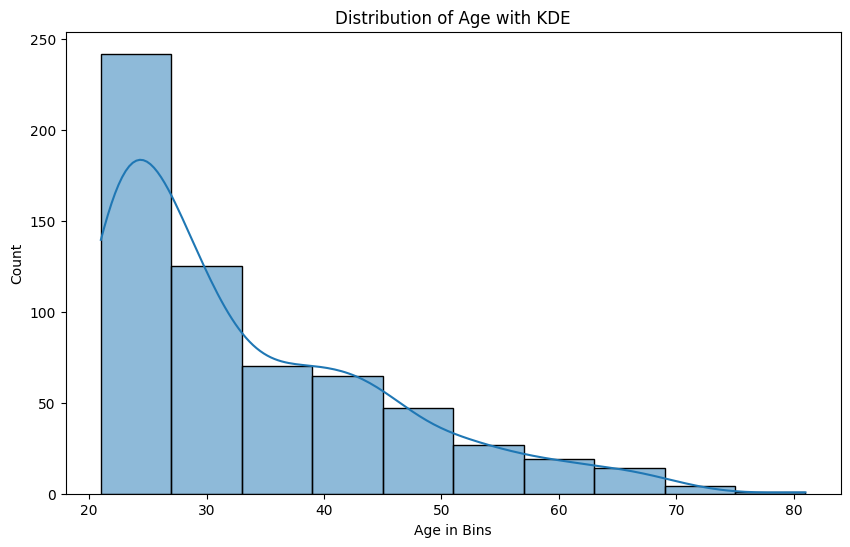

Skewness of Age: 1.14
Kurtosis of Age: 0.66


In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['age'], bins=10, kde=True, edgecolor='k')  # Use sns.histplot with kde=True to include KDE
plt.xlabel('Age in Bins')
plt.ylabel('Count')
plt.title('Distribution of Age with KDE')
plt.show()

age_kurtosis = kurtosis(df_train['age']).round(2)
skewness_age = stats.skew(df_train['age']).round(2)


print(f'Skewness of Age: {skewness_age}')
print(f'Kurtosis of Age: {age_kurtosis}')

The distribution below shows that the sample are positively skew which highlight majority of the sample have not been pregnant.

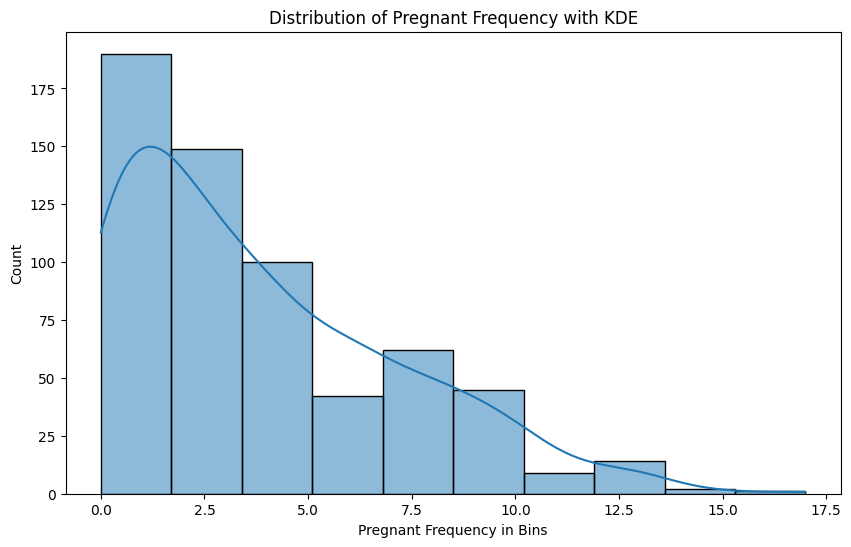

Skewness of time pregnant frequency: 0.9
Kurtosis of time pregnant frequency: 0.19


In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['no_times_pregnant'], bins=10, kde=True, edgecolor='k')  # Use sns.histplot with kde=True to include KDE
plt.xlabel('Pregnant Frequency in Bins')
plt.ylabel('Count')
plt.title('Distribution of Pregnant Frequency with KDE')
plt.show()

kurtosis_p = kurtosis(df_train['no_times_pregnant']).round(2)
skewness_p = stats.skew(df_train['no_times_pregnant']).round(2)


print(f'Skewness of time pregnant frequency: {skewness_p}')
print(f'Kurtosis of time pregnant frequency: {kurtosis_p}')

The distribution below show that blood pressure is negatively skew and has a higher peak compare to a normal distribution.

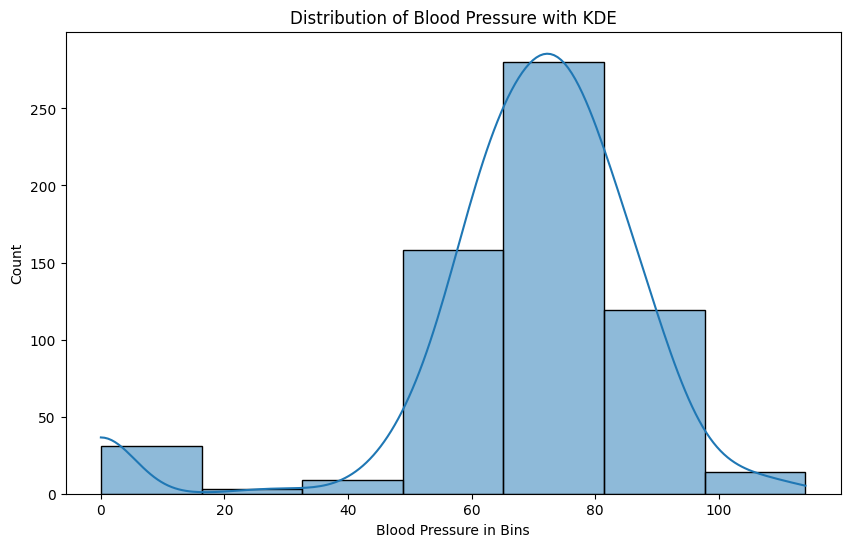

Skewness of blood pressure: -1.87
Kurtosis of blood pressure: 4.79


In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['blood_pressure'], bins=7, kde=True, edgecolor='k')
plt.xlabel('Blood Pressure in Bins')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure with KDE')
plt.show()

# Calculating kurtosis and skewness
blood_pressure_kurtosis = kurtosis(df_train['blood_pressure']).round(2)
blood_pressure_skewness = stats.skew(df_train['blood_pressure']).round(2)

# Printing the results
print(f'Skewness of blood pressure: {blood_pressure_skewness}')
print(f'Kurtosis of blood pressure: {blood_pressure_kurtosis}')

The histogram show that the distribution is positive skew and have a higher peak when compared to a normal distribution. 

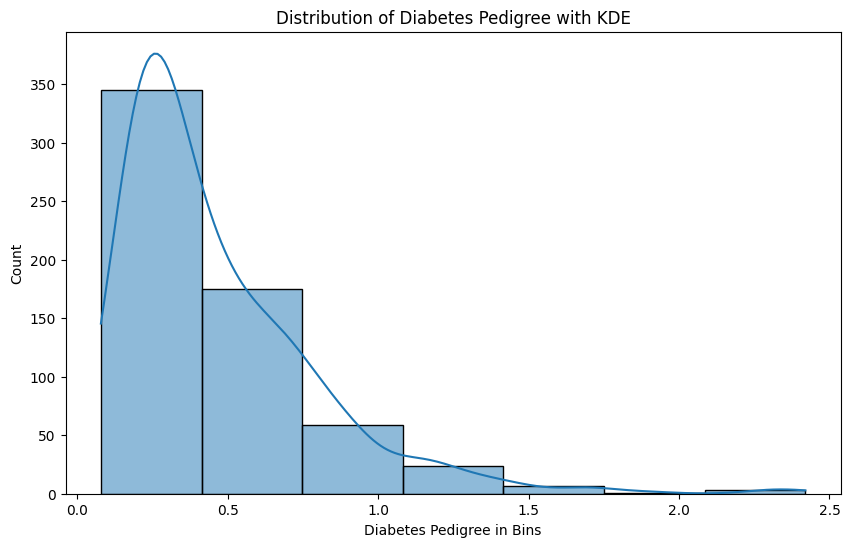

Skewness of diabetes pedigree: 1.97
Kurtosis of diabetes pedigree: 5.89


In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['diabetes pedigree'], bins=7, kde=True, edgecolor='k')
plt.xlabel('Diabetes Pedigree in Bins')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Pedigree with KDE')
plt.show()

# Calculating kurtosis and skewness
diabetes_pedigree_kurtosis = kurtosis(df_train['diabetes pedigree']).round(2)
diabetes_pedigree_skewness = stats.skew(df_train['diabetes pedigree']).round(2)

# Printing the results
print(f'Skewness of diabetes pedigree: {diabetes_pedigree_skewness}')
print(f'Kurtosis of diabetes pedigree: {diabetes_pedigree_kurtosis}')

### Bivariate Analysis

In [69]:
df_train

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


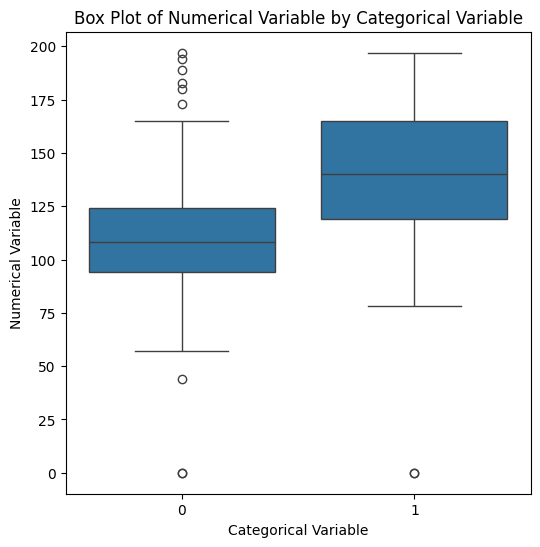

In [81]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='diabetes', y='glucose_concentration', data=df_train)
plt.xlabel('Categorical Variable')
plt.ylabel('Numerical Variable')
plt.title('Box Plot of Numerical Variable by Categorical Variable')
plt.show()

<Axes: xlabel='glucose_concentration', ylabel='blood_pressure'>

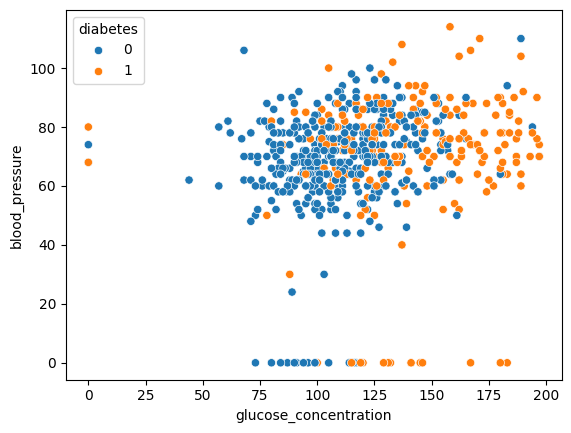

In [76]:
sns.scatterplot(x='glucose_concentration',y='blood_pressure', data= df_train, hue = 'diabetes')

### Multivariate Analysis

## Modeling